In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
import joblib
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
categories = {
    "train_acne": "Augmentized Train Acne",
    "train_dermatitis": "Augmentized Train Dermatitis",
    "train_eczema": "Augmentized Train Eczema",
    "train_impetigo": "Augmentized Train Impetigo",
    "train_psoriasis": "Augmentized Train Psoriasis",
    "train_scabies": "Augmentized Train Scabies",
    "train_tinea": "Augmentized Train Tinea", 
    "test_acne": "Augmentized Test Acne",  
    "test_dermatitis": "Augmentized Test Dermatitis",  
    "test_eczema": "Augmentized Test Eczema",  
    "test_impetigo": "Augmentized Test Impetigo",  
    "test_psoriasis": "Augmentized Test Psoriasis",  
    "test_scabies": "Augmentized Test Scabies",  
    "test_tinea": "Augmentized Test Tinea",  
}

In [3]:
# تحميل نموذج VGG16 مسبق التدريب لاستخراج الميزات (مع إزالة الطبقة الأخيرة)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# دالة لاستخراج الميزات من صورة باستخدام VGG16
def extract_features(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((128, 128))  # تغيير حجم الصورة لتتناسب مع VGG16
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # إضافة البعد الرابع لتناسب VGG16
    img_array = preprocess_input(img_array)  # معالجة الصورة لتناسب مدخلات VGG16
    features = vgg16_model.predict(img_array)  # استخراج الميزات من VGG16
    features = features.flatten()  # تحويل المصفوفة إلى 1D
    return features

In [4]:
# دالة لتحميل ومعالجة الصور واستخراج الميزات
def load_and_preprocess_images(root_folder, label):
    features = []
    labels = []
    # تصفح المجلد الرئيسي والمجلدات الفرعية
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(dirpath, filename)
                feature_vector = extract_features(img_path)  # استخراج الميزات
                features.append(feature_vector)
                labels.append(label)
    return np.array(features), np.array(labels)

In [5]:
# تحميل الصور والتسميات لجميع الفئات
all_features = []
all_labels = []
for label, folder_path in enumerate(categories.values()):
    features, labels = load_and_preprocess_images(folder_path, label)
    all_features.append(features)
    all_labels.append(labels)
    print(f"Loaded {len(features)} images for folder '{folder_path}'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
# دمج جميع البيانات
all_features = np.vstack(all_features)
all_labels = np.concatenate(all_labels)


In [7]:
# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.1, random_state=42)


In [8]:
# إنشاء نموذج SVM
clf = svm.SVC(gamma='scale')

In [9]:
# تدريب نموذج SVM
clf.fit(X_train, y_train)

SVC()

In [10]:
# تقييم النموذج
accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 67.50%


In [27]:
train_accuracy = clf.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 87.23%


In [29]:
# حفظ النموذج المدرب
joblib_file = "svm_model_with_vgg16_features.pkl"
joblib.dump(clf, joblib_file)
print(f"Model saved to {joblib_file}")

Model saved to svm_model_with_vgg16_features.pkl


In [12]:
# دالة لمعالجة صورة جديدة والتنبؤ بالفئة باستخدام النموذج المدرب
def preprocess_image(image_path):
    feature_vector = extract_features(image_path)  # استخراج الميزات
    feature_vector = feature_vector.reshape(1, -1)  # إعادة تشكيل البيانات لتناسب النموذج
    return feature_vector


In [13]:
def predict_category(image_path, model, categories):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)[0]
    category = list(categories.keys())[prediction]
    return category


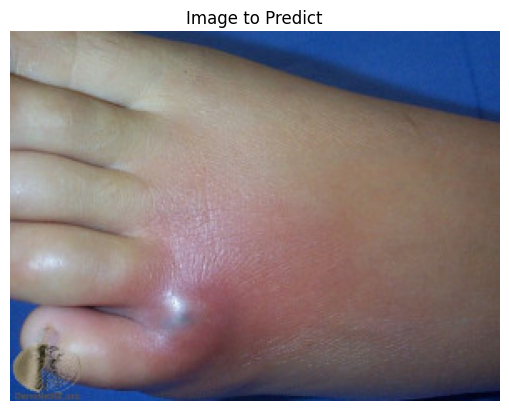

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Error during prediction: Predicted class 12 is not in the categories dictionary.


In [38]:
from PIL import Image
import matplotlib.pyplot as plt
import joblib
import os

def preprocess_image(image_path):
    # Your existing function for preprocessing the image
    feature_vector = extract_features(image_path)  # Extract features
    feature_vector = feature_vector.reshape(1, -1)  # Reshape for the model
    return feature_vector

def predict_category(image_path, model, categories):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)[0]
    prediction = int(prediction)  # Convert np.int64 to standard int
    
    if prediction not in categories:
        raise ValueError(f"Predicted class {prediction} is not in the categories dictionary.")
    
    return categories[prediction]

def display_image_with_label(image_path, model, categories):
    if not os.path.exists(image_path):
        print(f"Error: File not found at path {image_path}")
        return
    
    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title("Image to Predict")
    plt.show()
    
    # Predict category and print the label
    try:
        label = predict_category(image_path, model, categories)
        print(f"Predicted Label: {label}")
    except Exception as e:
        print(f"Error during prediction: {e}")

# Image path
new_image_path = r'E:\مشروع التخرج\Tst\#Prototype AAll Diseases\Augmentized Test Scabies\1_8.jpg'

# Load the trained model and corrected categories dictionary
model = joblib.load("svm_model_with_vgg16_features.pkl")
categories = {
    0: "Acne",
    1: "Dermatitis",
    2: "Eczema",
    3: "Impetigo",
    4: "Psoriasis",
    5: "Scabies",
    6: "Tinea"
}

# Display the image with its predicted label
display_image_with_label(new_image_path, model, categories)